# Research of sales advertising in the housing market 

The data is provided by Yandex.Realty, the real estate agency. The dataset is an archive of sales listings in the housing market in St. Petersburg (Russia) and the surrounding areas collected over the past few years. The goal is to research how to determine the market value of the real estate (set parameters that will help to determine it). This will allow to build an automated system that will track anomalies and fraudulent activity.

There are two types of data available for each apartment set for sale. The first type is entered by the user, the second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water.

# Data Description

**Note:** the data provided by the Yandex.Realty is about the housing market in Russia, thus some contents of the dataset might be in Russian language.

airports_nearest — distance to the nearest airport in meters (m)<br>
balcony - number of balconies<br>
ceiling_height – ceiling height (m)<br>
cityCenters_nearest — distance to the city center (m)<br>
days_exposition — how many days the ad was placed (from publication to removal)<br>
first_day_exposition - date of publication<br>
floor - which floor<br>
floors_total - total floors in the house<br>
is_apartment - apartments (boolean type)<br>
kitchen_area - kitchen area in square meters (m²)<br>
last_price - price at the time of removal from publication<br>
living_area - living area in square meters (m²)<br>
locality_name - name of the locality<br>
open_plan - free layout (boolean type)<br>
parks_around3000 — number of parks within a radius of 3 km<br>
parks_nearest — distance to the nearest park (m)<br>
ponds_around3000 — the number of ponds within a radius of 3 km<br>
ponds_nearest — distance to the nearest body of water (m)<br>
rooms - number of rooms<br>
studio - studio apartment (boolean type)<br>
total_area — area of ​​the apartment in square meters (m²)<br>
total_images — the number of photos of the apartment in the ad<br>

## Step 1. Data quality assessment

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from pymystem3 import Mystem # for stemming/lemmatization of Russian words

m = Mystem()

In [2]:
# opening the data file
df = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')

In [3]:
# getting the first 5 table strings.
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# looking at the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# checking for at the NaN values
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# finding the list of columns with NaN
df.columns[df.isna().any()].tolist()

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
# checking numeric values
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


The available data types include bool(2), float64(14), int64(3), object(3), we can check more information about object and bool dtypes

In [9]:
# checking quantitative values of object & bool data type
df.describe(include=['object','bool'])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


**Summary:** We have a table with the total of 23699 rows and 22 columns of data. Data types include float64, int64, bool and object. Findings:

1. Missing values in columns: ['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']
 2. Wrong data type in the following columns (and what it must be changed to): 
<br>first_day_exposition - change to datetime.
<br>floors_total - change to int.
<br>is_apartment - change to bool.
<br>balcony - change to int.
<br>parks_around3000 - change to int.
<br>ponds_around3000 - change to int.
<br>days_exposition - change to int.
3. Uneven letter case in 'locality_name'
4. Rooms have minimum value of 0 (should be 1)
5. Ceiling height has a minimum of 1m and max of 100 (check for data outliers)

## Step 2. Data preprocessing

### Processing the missing values

**- Processing 'balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest','ponds_nearest' columns**

There are missing values in the columns ('balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest','ponds_nearest'). Since we have no way of checking the reason behind the missing values in these column, we can hypothesize that the missing values here represent 0, e.g. NaN in 'balcony' means that there are 0 balconies in the apartment.

In [10]:
# Filling the missing values with 0
df[['balcony', 'parks_around3000', 
    'ponds_around3000', 'parks_nearest','ponds_nearest']] = df[['balcony','parks_around3000',
                                                                'ponds_around3000','parks_nearest','ponds_nearest']].fillna(0)

**- Processing 'ceiling_height', 'floors_total', 'airports_nearest', 'cityCenters_nearest' columns**

Do the similar action for 'ceiling_height',
    'floors_total',
    'airports_nearest',
    'cityCenters_nearest' but fill the missing values with *median* in each column. We replace them with median value because the median is resistant to the outliers in the data.

In [11]:
fill_with_median = ['ceiling_height',
    'floors_total',
    'airports_nearest',
    'cityCenters_nearest']
for i in fill_with_median:
    df[i] = df[i].fillna(df[i].median())

**- Processing 'ceiling_height' column**

In [12]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

We can see that there are 25% or the data that represent the rooms with the ceiling height of above 2.7 meters and that the height might go up to 100 meters, which seems unrealistic.
Let's check how many apartments have a ceiling height beyond 10 meters:

In [13]:
# count the number of height above 10 m
df.query('ceiling_height >= 10')['ceiling_height'].count()

25

So we have a total of 25 apartments with the ceiling height more than 10 m. We replace them with median value because the median is resistant to the data outliers.

In [14]:
# count mean for "ceiling_height" column
median_height = df['ceiling_height'].median() 

# replace values > 10 with "median_height"
df.loc[df['ceiling_height'] >= 10, 'ceiling_height'] = median_height

**- Processing 'days_exposition' column**

Fill rhe column 'days_exposition' with the max values (number of days) in this column, hypothesizing that the missing values here represent that the apartment hasn't been sold yet and is still being listed for sale: 

In [15]:
max_days_exp = df['days_exposition'].max()
print('Max number of days displayed:', max_days_exp)
print('Max number of days converted to years',round(max_days_exp/365)) #number of years of the apartment being sold on real estate agency (up to current date)

# filling in the missing values
df['days_exposition'] = df['days_exposition'].fillna(max_days_exp)

Max number of days displayed: 1580.0
Max number of days converted to years 4


**- Processing 'rooms' column**

In the Step 1 we found that the 'rooms' column had an abnormality of having 0 rooms. We can hypothesize that the 0 might represent the values such as 'studio' apartment or 'open_plan':

In [16]:
# checking the values
df['rooms'].value_counts() 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

We have 197 "rooms" = 0. Check how many of these represent 'studio' or 'open_plan' apartment type:

In [17]:
# using .query() to obtain the necessary information
df.query('rooms == 0 and (studio == True or open_plan == True)')['rooms'].count() 

197

We got the number that is exactly equal to the number of the variables in 'rooms' with the value 0. Now check if there're any rooms in 'studio' or 'open_plan' where number of rooms is *not* 0:

In [18]:
# using .query() to obtain the necessary information
df.query('rooms != 0 and (studio == True or open_plan == True)')['rooms'].count() 

19

We can safely replace these remaining 19 values with 0s, and from now on we will be aware that '0' rooms represent either the 'studio' apartments or 'open_plan ' 

In [19]:
# replacing to 0 for 'studio'
df.loc[(df['rooms'] != 0) & (df['studio'] == True), 'rooms'] = 0

#replacing to 0 for 'open_area'
df.loc[(df['rooms'] != 0) & (df['open_plan'] == True), 'rooms'] = 0

**- Processing 'living_area','kitchen_area' columns**

Because 'living_area' and 'kitchen_area' rooms' sizes are both related to the number of rooms in the apartment (the more there are rooms, the bigger the apartment), group these by the room numbers and fill in the missing values with median as it is resistant to the outliers in the data:

In [20]:

df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))
df['kitchen_area'] = df.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

    # check the values
print('living area', df['kitchen_area'].isnull().sum())
print('kitchen',df['kitchen_area'].isnull().sum())

living area 216
kitchen 216


C:\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


It can be seen that there were some values in the 'kitchen_area' that didn't fall into any group. We hypothesize that these values are the 'studio' and 'open_plan': 

In [21]:
# check the values again with "rooms" == 0 and "studio" == True or "open_plan" == True
len(df[(df['kitchen_area'].isnull()) & ((df['studio'] == True) | (df['open_plan'] == True))])

216

Our theory was correct, so we can replace these NaN values with "0" in the "kitchen_area" because this belongs to the 'studio' and 'open_plan' and there's no kitchen in these apartment types:

In [22]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

**- Processing 'is_apartment' column**

The column 'is_apartment' is a column with boolean values that represents whether the realty set for sales is apartment or not. We can hypothesize that the missing values represent the 'False':

In [23]:
#  checking he values
print(df['is_apartment'].value_counts()) 

#filling the missing values with False
df['is_apartment'] = df['is_apartment'].fillna('False')
print(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64
False    20924
False     2725
True        50
Name: is_apartment, dtype: int64


**- Processing 'locality_name' column**

We don't know exactly what localities could there be in the missing values in 'locality_name' but we could check the appropriate values in another column:'cityCenters_nearest' (whether the apartment is far from the city center):

In [24]:
# check the total number of missing values in 'locality_name'
locality_missing = df[df['locality_name'].isnull()]['cityCenters_nearest'].count()
print('Locality missing',locality_missing)

# checking how many of the missing values in 'locality_name' are within 10km from the city center 
cc_nearest = df[df['locality_name'].isnull()].query('cityCenters_nearest < 10000')['cityCenters_nearest'].count()
print('Nearest to city center',cc_nearest)

Locality missing 49
Nearest to city center 25


There are slightly more than 50% of the missing values are within the city center and we cannot simply assume what those places are. However, we can still fill in the missing value with the variable that represents 'Unknown'('Неизвестно'):

In [25]:
#filling in the rest of the missing values with 'Unknown'
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

In [26]:
# Checking the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [27]:
# Checking the results
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,1580.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Summary:** We've completed the first step in data preprocessing and filled in all the missing values in the dataset accordingly.

### Data type replacement

Reminder what columns' data types need to be replaced and to what value (as mentioned in Step 1):

first_day_exposition - change to datetime.
<br>floors_total - change to int.
<br>is_apartment - change to bool.
<br>balcony - change to int.
<br>parks_around3000 - change to int.
<br>ponds_around3000 - change to int.
<br>days_exposition - change to int.

In [28]:

# changing all the columns that needed to be changed to int
df = df.astype({'last_price':'int','total_area':'int', 'ceiling_height':'int', 'floors_total':'int', 'living_area':'int',
                'kitchen_area':'int', 'balcony':'int', 'airports_nearest':'int', 'cityCenters_nearest':'int',
                'parks_around3000':'int', 'parks_nearest':'int', 'ponds_around3000':'int',
                'ponds_nearest':'int', 'days_exposition':'int'})

# changing 'is_apartment' to boolean
df['is_apartment'] = df['is_apartment'].astype('bool')

# changing 'first_day_exposition' to the appropriate date format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# changing entirety of 'locality_name' to lowercase
df['locality_name'] = df['locality_name'].str.lower()

### Stemming/Lemmatization

We need to stem (or lemmatize) the 'locality_name' column. In step 1 we saw that the values in this column all have different letter case. Therefore, we need to bring all of the values to the appropriate letter case by using lemmatization method

In [29]:
%%script echo skipping
# converting list to string
lemmas = m.lemmatize(' '.join(df['locality_name']))

Couldn't find program: 'echo'


In [30]:
%%script echo skipping
# check the list of unique values
display(df['locality_name'].unique())

Couldn't find program: 'echo'


In [31]:
%%script echo skipping
# manually creating a dictionary with the unique values as exceptions
exceptions = ['\n', 'посёлок', 'поселок', 'село', 'город', 'городской', 'деревня', 'бор', 'луг','городского', 'типа']

# writing a function for lemmatization
def lemmatize_col(row):
    for word in m.lemmatize(row):
        if word in list(set(lemmas)) and (word not in exceptions):
            return word  
        if word in exceptions:
            return ''.join(row.split(' ', 1)[1:]).lower()

Couldn't find program: 'echo'


In [32]:
%%script echo skipping
# applying lemmatize_col function to the dataframe
df['locality_name'] = df['locality_name'].apply(lemmatize_col)

Couldn't find program: 'echo'


In [33]:
%%script echo skipping
# checking the values
print(df['locality_name'].unique())

df.info()

Couldn't find program: 'echo'


**Summary:** We have processed the missing values, filled them in with the appropriate values, replaced the data types for the columns where it was needed.

## Step 3. Making calculations and adding them to the dataframe

**Calculate the price per square meter and add to 'price_sq_m' column**

In [34]:
df['price_sq_m'] = (df['last_price']/df['total_area']).astype('int')

**Calculate the day of the week, month, and year that the ad was published and add to 'publication_day', 'publication_month', 'publication_year' columns**

In [35]:
df['publication_day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['publication_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['publication_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

**Categorize by "floor" into 'first'('первый'), 'last'('последний'), 'other'('другой') and add the new 'floors_type' column**

In [36]:
df['floors_type'] = df.apply(lambda row: 'первый' if row['floor']== 1 else ('последний' if row['floor'] == row['floors_total'] else 'другой'),axis=1)

**Calculate the ratio between the living space and the total area, the kitchen space and the total area, and add add 'living2total_ratio', 'kitchen2total_ratio' columns**

In [37]:
df['living2total_ratio'] = (df['living_area']/df['total_area']).round(2)
df['kitchen2total_ratio'] = (df['kitchen_area']/df['total_area']).round(2)

**Convert the 'last_price' to millions**

In [38]:
df['last_price_in_mln'] = df['last_price']/1000000

In [39]:
# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  int32         
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  int32         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int32         
 13  balcony         

**Summary**: We have made the calculations and added the new columns to the dataframe. This will be useful to us in the next step of the research.

## Step 4. Exploratory data analysis

Take a look 'last_price_in_mln', 'total_area', 'rooms', 'ceiling_height', and plot a histogram for each of the variables:

In [40]:
df[['total_area','last_price_in_mln','rooms','ceiling_height']].describe()

,total_area,last_price_in_mln,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.120511,6.541549,2.069328,2.115068
std,35.665822,10.887013,1.079409,0.340479
min,12.000000,0.012190,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.000000
50%,52.000000,4.650000,2.000000,2.000000
75%,69.000000,6.800000,3.000000,2.000000
max,900.000000,763.000000,19.000000,8.000000


Column 'last_price_in_mln' has an unusual min value. Check to be sure:

In [41]:
# using .query() and .sort_values() methods
df.query('last_price_in_mln < 1').sort_values(by='last_price_in_mln') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_m,publication_day,publication_month,publication_year,floors_type,living2total_ratio,kitchen2total_ratio,last_price_in_mln
8793,7,12190,109,2019-03-20,2,2,25,32,25,True,...,0,8,111,20,3,2019,последний,0.29,0.37,0.012190
14911,5,430000,54,2018-06-26,2,2,3,30,3,True,...,0,44,7962,26,6,2018,последний,0.56,0.15,0.430000
17456,7,430000,30,2019-04-22,1,2,2,16,1,True,...,0,1580,14333,22,4,2019,первый,0.53,0.20,0.430000
16274,18,440000,40,2018-07-10,1,2,5,17,1,True,...,0,45,11000,10,7,2018,первый,0.42,0.22,0.440000
9581,7,450000,43,2018-08-31,2,2,5,30,3,True,...,0,96,10465,31,8,2018,другой,0.70,0.12,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,9,990000,34,2016-05-31,2,2,2,26,2,True,...,0,78,29117,31,5,2016,последний,0.76,0.24,0.990000
14341,8,990000,28,2018-01-04,1,2,2,18,1,True,...,0,1580,35357,4,1,2018,первый,0.64,0.32,0.990000
13420,3,995000,31,2015-05-13,1,2,5,17,2,True,...,0,757,32096,13,5,2015,другой,0.55,0.16,0.995000
1761,11,999000,62,2018-02-15,4,2,5,46,2,True,...,0,226,16112,15,2,2018,другой,0.74,0.11,0.999000


There's one value of 0.012190. Drop it.

In [42]:
# drop row with 0.012190 value in the "last_price_mil"
df.drop(df[df['last_price_in_mln'] == 0.012190].index, inplace=True)

**Plotting a histogram for 'last_price_in_mil' column**

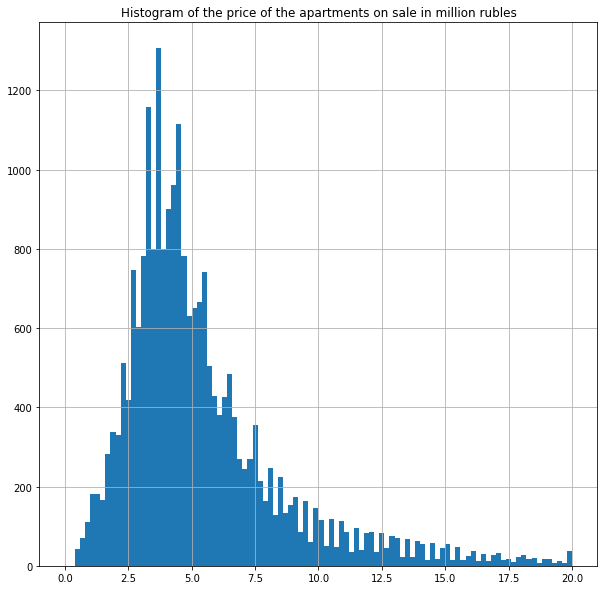

In [43]:
df['last_price_in_mln'].hist(bins=100, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the price of the apartments on sale in million rubles')
plt.show()

This histogram shows that most of the apartments being offered for sale have their prices set from 1 to 20 million rubles. Frequency of other values is significantly lower.

**Plotting a histogram for 'total_area' column**

Text(0.5, 1.0, 'Histogram of the areas of the apartments on sale')

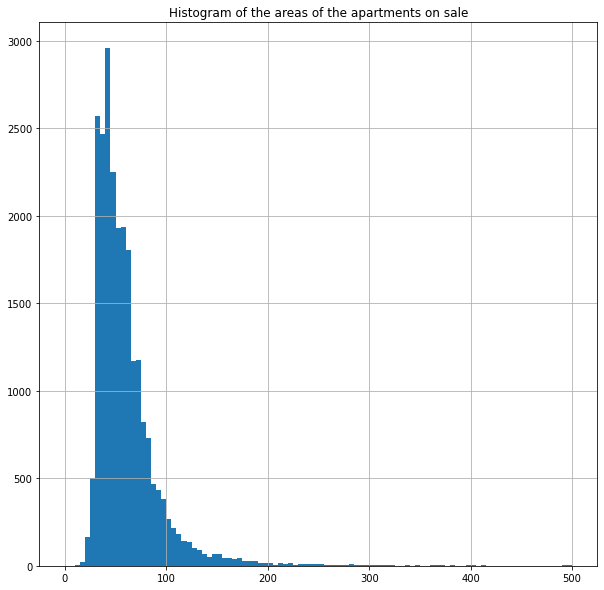

In [44]:
# plotting a histogram
df['total_area'].hist(bins=100, range=(0,500), figsize=(10,10), grid=True)
plt.title('Histogram of the areas of the apartments on sale')

This histogram shows that most of the housings set for sale have an area of 0 to 200 square meters. Reduce the number of bins and the range further to see the data a bit more clear:

Text(0.5, 1.0, 'Histogram of the areas of the apartments on sale')

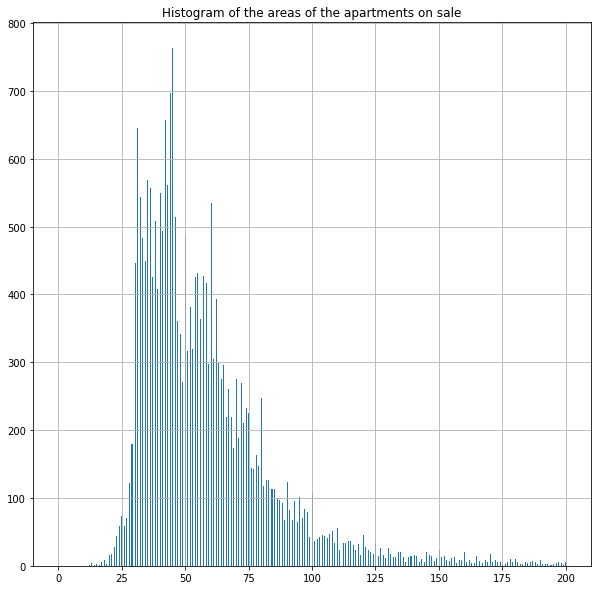

In [45]:
# plotting a histogram
df['total_area'].hist(bins=500, range=(0,200), figsize=(10,10), grid=True)
plt.title('Histogram of the areas of the apartments on sale')

A lot of values are in the range of 25 to 150. Frequency of other values is much lower.

**Plotting a histogram for 'rooms' column**

Text(0.5, 1.0, 'Histogram of the number of rooms in the apartments on sale')

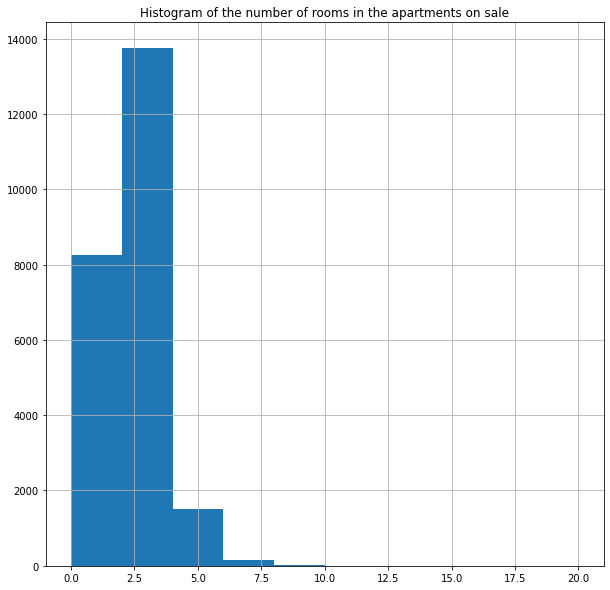

In [46]:
df['rooms'].hist(bins=10, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the number of rooms in the apartments on sale')

This histogram shows that most apartments in the dataset have from 0 to 4 rooms (remember that 0 represents 'studio' and 'open plan' apartment types.)

**Plotting a histogram for 'ceiling_height' column**

Text(0.5, 1.0, 'Histogram of the number of rooms in the apartments on sale')

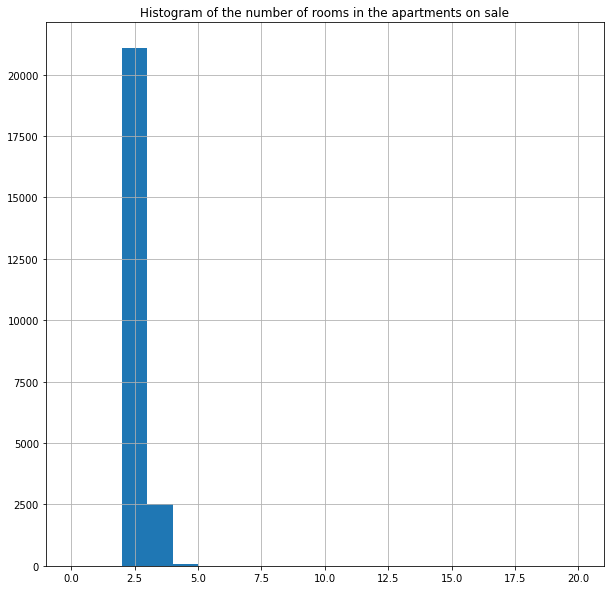

In [47]:
df['ceiling_height'].hist(bins=20, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the number of rooms in the apartments on sale')

Cannot see data clearly enough. Reduce the number of bins and range:

Text(0.5, 1.0, 'Histogram of the number of rooms in the apartments on sale')

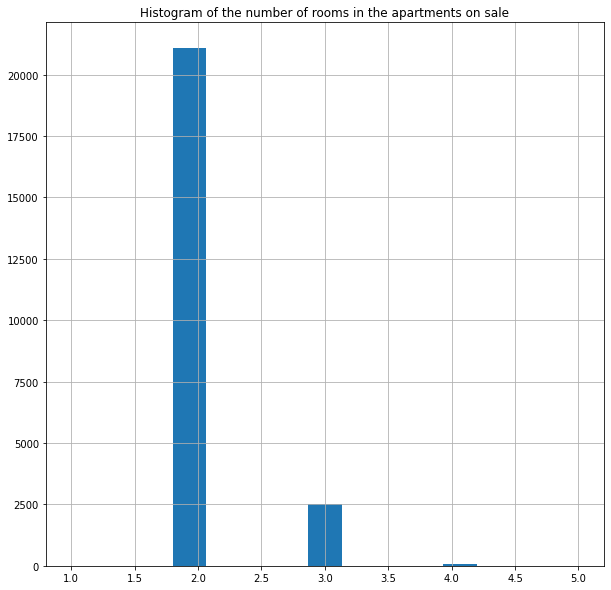

In [48]:
df['ceiling_height'].hist(bins=15, range=(1,5), figsize=(10,10), grid=True)
plt.title('Histogram of the number of rooms in the apartments on sale')

This histogram shows that most of the apartments have a ceiling height from 2 to 4 meters.

**Summary:** After evaluating the histograms, we set most popular ranges:

1. 'last_price' is in the range of 1 to 20 million rubles.<br>
2. 'total_area' is in the range of 25 to 150 $m^2$.<br>
3. 'rooms' is in the range of 1 to 4.<br>
4. 'ceiling_height' is 2 m and 4 m.<br>

**Plotting a histogram for 'days_exposition' column**

Researching the average time that is required to sell the apartment. Examine "days_exposition":

In [49]:
df['days_exposition'].describe()

count    23698.000000
mean       368.699679
std        518.936557
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [50]:
mean = (df['days_exposition'].mean()).round(2)
median = (df['days_exposition'].median()).round(2)
print("Mean for number of days to sell the apartment is {} days".format(mean))
print("Median for number of days to sell the apartment is {} days".format(median))

Mean for number of days to sell the apartment is 368.7 days
Median for number of days to sell the apartment is 124.0 days


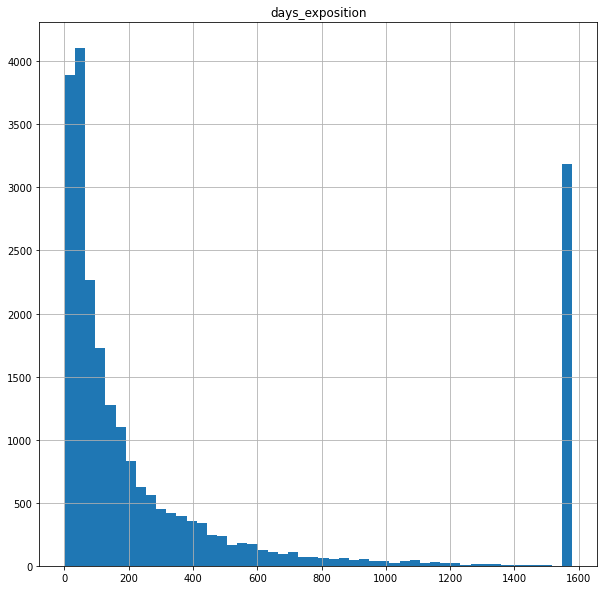

In [51]:
# plot a histogram for 'days_exposition'
df.hist(column='days_exposition', bins=50, range=(1, 1580), figsize=(10,10)) 
plt.show()

We can see an obvious data outlier on 1590. Let's keep checking and reduce the number of bins and range:

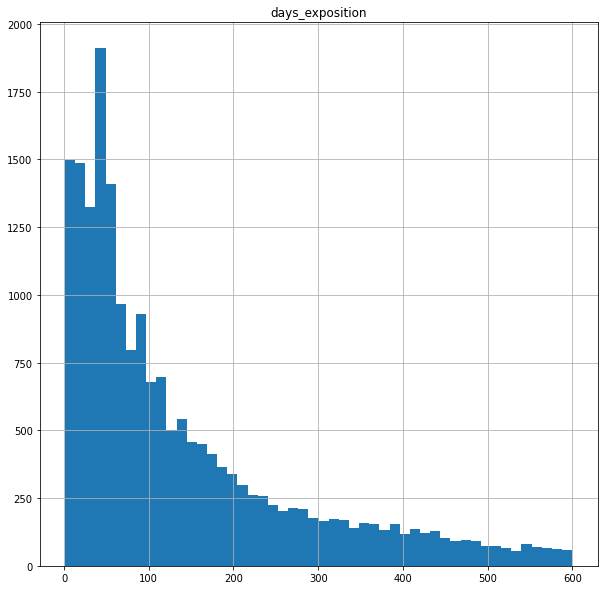

In [52]:
df.hist(column='days_exposition', bins=50, range=(1, 600), figsize=(10,10))
plt.show()

There's a data outlier in between 30-60. Lets reduce the range a bit more:

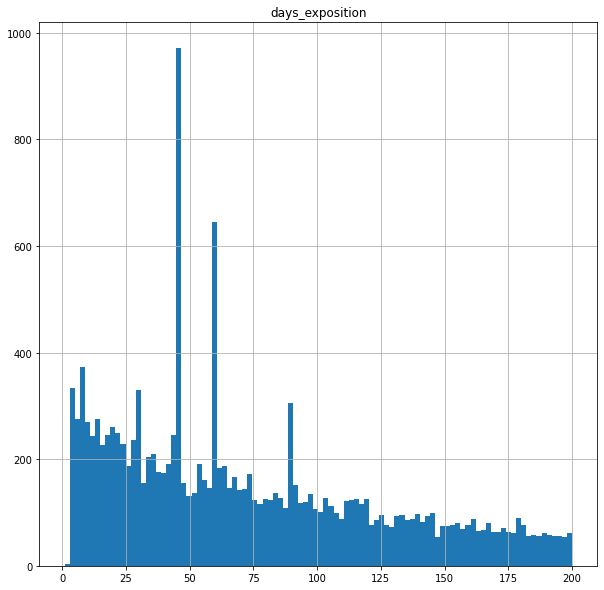

In [53]:
df.hist(column='days_exposition', bins=100, range=(1, 200),figsize=(10,10)) 
plt.show()

We can see another 2 data outliers between 40 and 60 days. 

**Summary**: The mean of 'days_exposition' is *bigger* than its median because there are data outliers at the max value (1580), and between 40 and 60 days. The median is resistant to outliers, so the average time it usually takes to close the sale is *95 days*. 

Let's create a boxplot to see the outliers a bit more clear:

(-50.0, 1500.0)

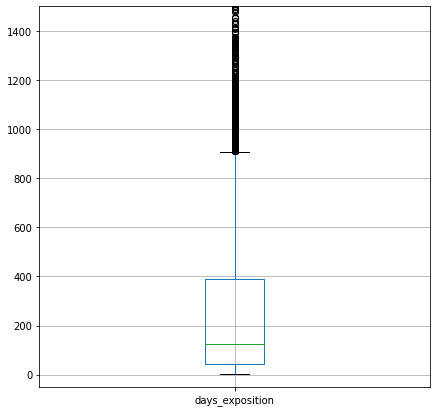

In [54]:
# plot boxpot for 'days_exposition'
df.boxplot(column='days_exposition', figsize=(7,7)) 
plt.ylim(-50, 1500)

**Summary:**
We've confirmed that the sales for these apartments on average happened rather quickly (in less than 45 days), while other sales have taken an much longer time - more than 232 days. Both of these values seem quite realistic.

### Removing the outlying values and describing the patterns

We have established that our dataset contains values which we can remove and create slices with the clean data. Draw the boxlplots to check for the data outliers in 'last_price_in_mln', 'total_area', 'rooms', 'ceiling_height' columns:

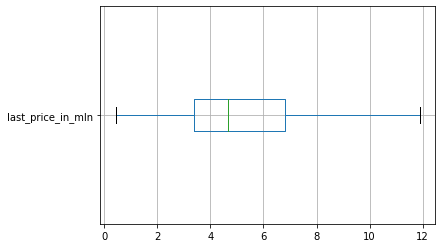

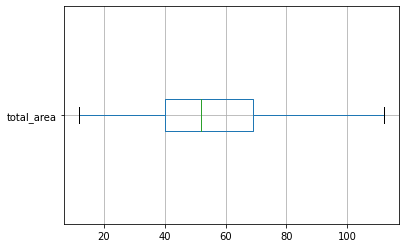

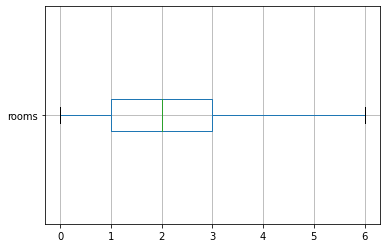

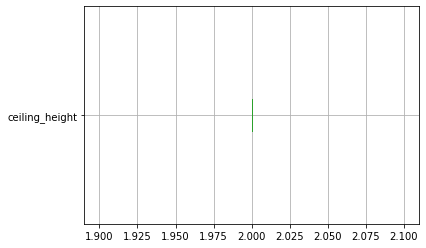

In [73]:
# plot boxpot
for col in ('last_price_in_mln', 'total_area', 'rooms','ceiling_height',):
    df.boxplot(column=col, showfliers=False, vert=False) 
    plt.show()

Based on the boxplots above and our previous research results we can choose the best parameters with the .query() method:

In [56]:
df_new = (
    df.query('1 <= last_price_in_mln <= 12 and 30 <= total_area <= 150 and 1 <= rooms <= 6 and 2.2 <= ceiling_height <= 4')
)

Make sure that we didn't cut too much data:

In [57]:
(1-df_new.shape[0])/(1-df.shape[0]) * 100

7.182343756593662

No problem.

**Summary:** The best parameters for the following columns are:
1. 'last_price' is in the range of 1 to 12 million rubles.<br>
2. 'total_area' is in the range of 20 to 150 $m^2$.<br>
3. 'rooms' is in the range of 1 to 5.<br>
4. 'ceiling_height' is 2.2 m and 4 m.<br>

### Finding factors that have the biggest influence on an apartment’s price

**Relationship between the apartment's price and the total area of the apartment, number of rooms, and distance to the downtown area**

First, look at the correlation between relevant variables:

In [58]:
price_RoomAreaCenter = df[['price_sq_m','total_area', 'rooms','cityCenters_nearest']]

#finding correlation
display(price_RoomAreaCenter.corr())

,price_sq_m,total_area,rooms,cityCenters_nearest
price_sq_m,1.000000,0.298829,0.051371,-0.252517
total_area,0.298829,1.000000,0.757457,-0.210650
rooms,0.051371,0.757457,1.000000,-0.160764
cityCenters_nearest,-0.252517,-0.210650,-0.160764,1.000000


**Summary:** In this variable correlation table we're most interested in the leftmost column.

The price, number of rooms, and area have a positive but weak correlation between each other. Having a positive correlation means that if one of the variables increases, the second one will also increase (but not significantly, since it has a very small value). The same applies to 'cityCentersNearest' but in this case it means that if one of the variables becomes smaller, then the second, on the contrary, will grow (for example, perhaps majority of the potential buyers prefer lower ceilings in their apartments and are willing to pay a little more for an apartment with low ceilings. However, since there is no strong correlation, the conclusion suggests itself that there are some other factors unknown to us that might affect the price. 

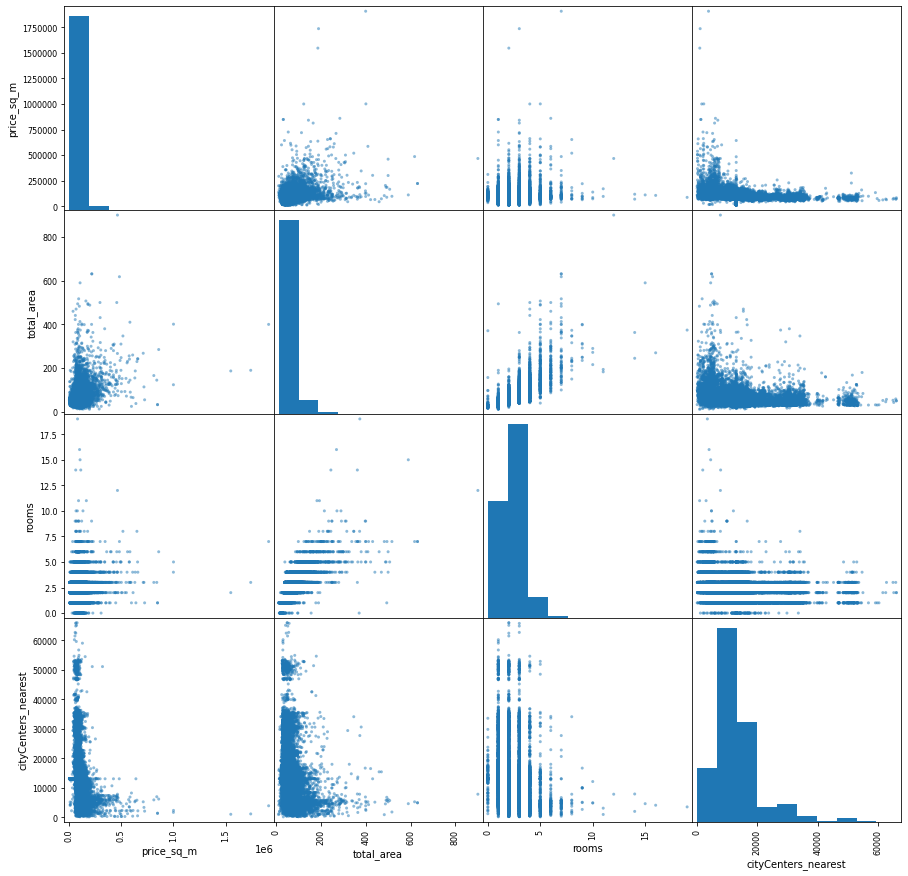

In [59]:
#plotting the scatter matrix for the aforementioned variables
pd.plotting.scatter_matrix(price_RoomAreaCenter, figsize=(15, 15)) 
plt.show()

**Summary:** In this scatterplot matrix we're interested in the leftmost column. Findings:
 
1. The housing price ratio to the apartments' total area and the number of rooms is unevenly distributed - this means insufficient or strong heterogeneity of data in the dataset (possibly errors in the data). However, in the scatterplots it can be seen that the smaller the area and the smaller the number of rooms, the lower the price of the apartment regardless of the location.
2. The dependence of the price on the distance of the apartments from the center shows that the price can be relatively low at a fairly large distance from the center. However in this case, we are examining all of regions together which can greatly reduce the accuracy of our research. Below we will consider the same dependence for a specific location - St. Petersburg, Russia ('Санкт Петербург')

**Relationship between the apartment's price and the number of the floor of the apartment in the building**

Creating a pivot table will help us to see how the price changes between the first floor('первый'), last floor('последний') and other floors('другой')

In [60]:
price_from_floor = df.pivot_table(index='floors_type', values='price_sq_m', aggfunc=['count','mean','median'])
price_from_floor.columns = ['count', 'mean_price', 'median_price']
display(price_from_floor)

,count,mean_price,median_price
floors_type,,,
другой,17441,103961.716530,98705
первый,2917,82361.068906,81578
последний,3340,93851.319162,88461


* **Eng translation:**

|floors_type|count|mean_price|median_price|
| ---| --- | --- | --- |
|other|17441|103961|98705|
|first|2917|82361|81578|
|last|3340|93851|88461|

**Summary:** Despite the fact that the highest average price of the apartments on sale is the "other" floor level, it should be taken into account that the difference in the number of 'other' is  6 times bigger than the number 'first' and 'last' floors (we have 17441 of 'other' floors and only 2917 and 3340 of 'first' and 'last'). The difference in the median of the price is not big. From this we can conclude that the most expensive apartments (on average) are the apartments on the top floor, then they're followed by apartments on the first floor, and finally apartments on the remaining floors are sold at a more moderate price.

**Relationship between the apartment's price and the date of the advertisement's publication**

To study the dependence of the price on the date of the publication of the real estate listing, we need to plot the scatter matrix for the following variables: day of the week, month and year.

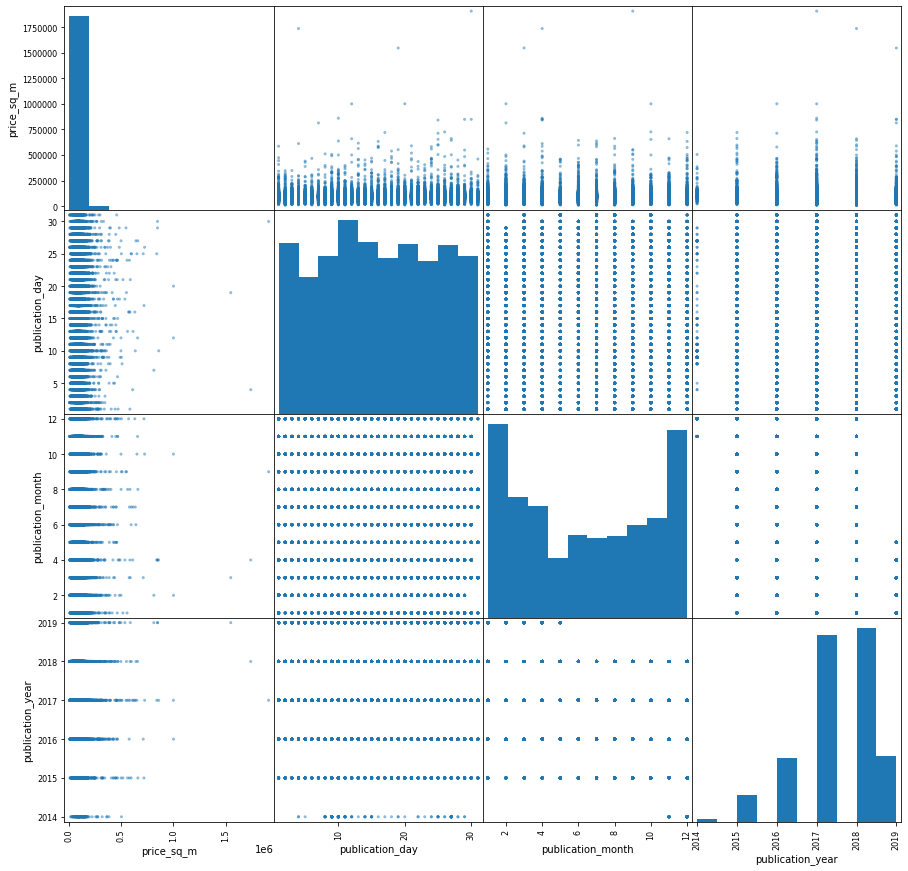

In [61]:
price_from_date = df[['price_sq_m','publication_day', 'publication_month','publication_year']]
pd.plotting.scatter_matrix(price_from_date, figsize=(15, 15)) 
plt.show()

**Summary** : Again, we're interested in the leftmost column of the scatter matrix.
1. The scatter matrix shows that prices have increased significantly since 2014. The highest price was recorded in 2017, and the overall price spread in 2018 (the year of the research) is relatively higher than the rest. Perhaps this spike in the price is due to the global economic crisis that occurred in 2015-16, but there may be other reasons.
2. As for the 'day' and 'month', here the spreads are concentrated a little more evenly than in 'year', which means that the price does not depend much on the time of year and the day of the month.

**Relationship between the apartment's price and area where it is located**

To study the dependence of the price on the date of the publication of the real estate listing, we need to create a pivot table for the 'locality_name' column.

In [62]:
# creating a pivot table of locations with the highest and lowest cost of the housing
locations_price = df.pivot_table(index='locality_name', values='price_sq_m', aggfunc='max')
highest_prices_loc = locations_price['price_sq_m'].nlargest(10)
print(highest_prices_loc)

locality_name
санкт-петербург      1907500
всеволожск            642444
зеленогорск           323943
пушкин                256521
петергоф              228392
неизвестно            197752
сестрорецк            182688
посёлок репино        175000
посёлок лисий нос     169883
кудрово               162025
Name: price_sq_m, dtype: int32


* **Eng translation**

locality_name<br>
Sanit Petersburg     1907500<br>
Vsevolozshk            642444<br>
Zelenogorsk          323943<br>
Pushkin                256521<br>
Petergoff              228392<br>
Unknown            197752<br>
Sestroretsk            182688<br>
Repino village        175000<br>
Lisiy Nos village     169883<br>
Kudrovo               162025<br>
Name: price_sq_m, dtype: int32<br>

**Summary:** As a result, we found 10 settlements with the most expensive housing prices. In the first place - St. Petersburg, - the price per sq. meter of which is 11 times bigger than the smaller value on this list (Kudrovo).

**Relationship between the apartment's price and its distance from the city center**

To study the dependence of the price on the date of the publication of the real estate listing, we need to plot a histogram for the 'cityCenters_nearest' column. For our convenience, we recalculate this column's values (which represent the distance in meters) in kilometers(km) and call this new column 'km_to_cityCenters':

In [63]:
#conversion of the distance to the city center in meters to kilometers
df['km_to_cityCenters'] = (df['cityCenters_nearest'] / 1000).round(0)

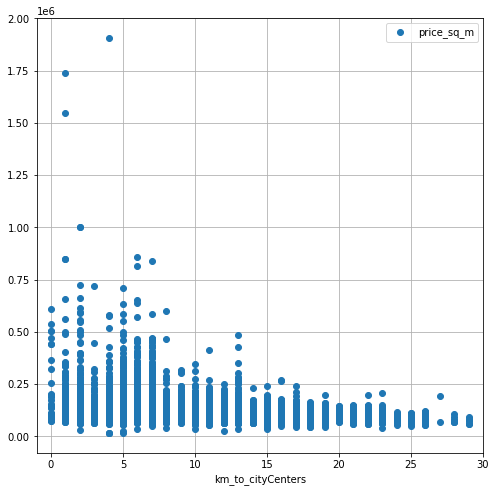

In [64]:
# making a slice with the value that represents the city center - 'Saint Petersburg' ('санкт петербург')
spb_slice = df.query('locality_name == "санкт-петербург"')

spb_slice.plot(x='km_to_cityCenters', y='price_sq_m', style='o', xlim=(-1, 30), grid=True, figsize=(8,8)) 
plt.show()

**Summary:** : This graph shows that the closer the apartment is to the Saint Petersburg (the closer it to 0), the higher the housing prices. We can also see several data outliers which indicate an unusual price spike on certain real estate listings. It could potentially be a sign of the fraudulent activity of the seller. 

Now let's take a closer look the the pricing of the apartments in the Saint Petersburg itself:

To find what we want, we need to determine what distance from the city 0 is still counting as the "downtown area". Let's approximate and say that the city center is within 2km radius in the center of the city.

In [65]:
# making a slice with .query() method
spb_cityCenter = spb_slice.query('km_to_cityCenters <= 2')

    # check
display(spb_cityCenter.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_sq_m,publication_day,publication_month,publication_year,floors_type,living2total_ratio,kitchen2total_ratio,last_price_in_mln,km_to_cityCenters
24,8,6500000,97,2015-10-31,2,2,3,46,1,True,...,265,67010,31,10,2015,первый,0.47,0.20,6.50,2.0
155,8,96000000,317,2017-07-07,4,3,3,183,3,True,...,62,302839,7,7,2017,последний,0.58,0.03,96.00,2.0
207,11,9000000,72,2018-09-08,2,2,5,43,4,True,...,1580,125000,8,9,2018,другой,0.60,0.15,9.00,2.0
213,11,8700000,111,2016-10-10,4,3,4,73,2,True,...,791,78378,10,10,2016,другой,0.66,0.13,8.70,1.0
226,17,7950000,86,2019-04-24,4,2,3,52,1,True,...,1580,92441,24,4,2019,первый,0.60,0.14,7.95,2.0


Now check the values:

In [66]:
# checking the distribution between variables using .describe() method
df[['price_sq_m','total_area', 'rooms','ceiling_height']].describe()

,price_sq_m,total_area,rooms,ceiling_height
count,2.369800e+04,23698.000000,23698.000000,23698.000000
mean,9.987792e+04,60.118449,2.069331,2.115073
std,5.041532e+04,35.665161,1.079432,0.340485
min,7.962000e+03,12.000000,0.000000,1.000000
25%,7.699775e+04,40.000000,1.000000,2.000000
50%,9.545400e+04,52.000000,2.000000,2.000000
75%,1.148640e+05,69.000000,3.000000,2.000000
max,1.907500e+06,900.000000,19.000000,8.000000


No problem.

In [67]:
# finding the correlation between variables
df[['price_sq_m','total_area', 'rooms','ceiling_height']].corr()

,price_sq_m,total_area,rooms,ceiling_height
price_sq_m,1.000000,0.298829,0.051371,0.249182
total_area,0.298829,1.000000,0.757457,0.338754
rooms,0.051371,0.757457,1.000000,0.248575
ceiling_height,0.249182,0.338754,0.248575,1.000000


**Summary:** It can be seen from the variable correlation table above that the strongest correlation is the correlation between the number of rooms and the area of the apartment (reasonably so). The correlation for all other variables is positive, but weak, which means that if one of the variables increases, the other also increases but not significantly. As with the previous correlation table, this means that there may be some other, more significant influencing the price factors that we are missing.

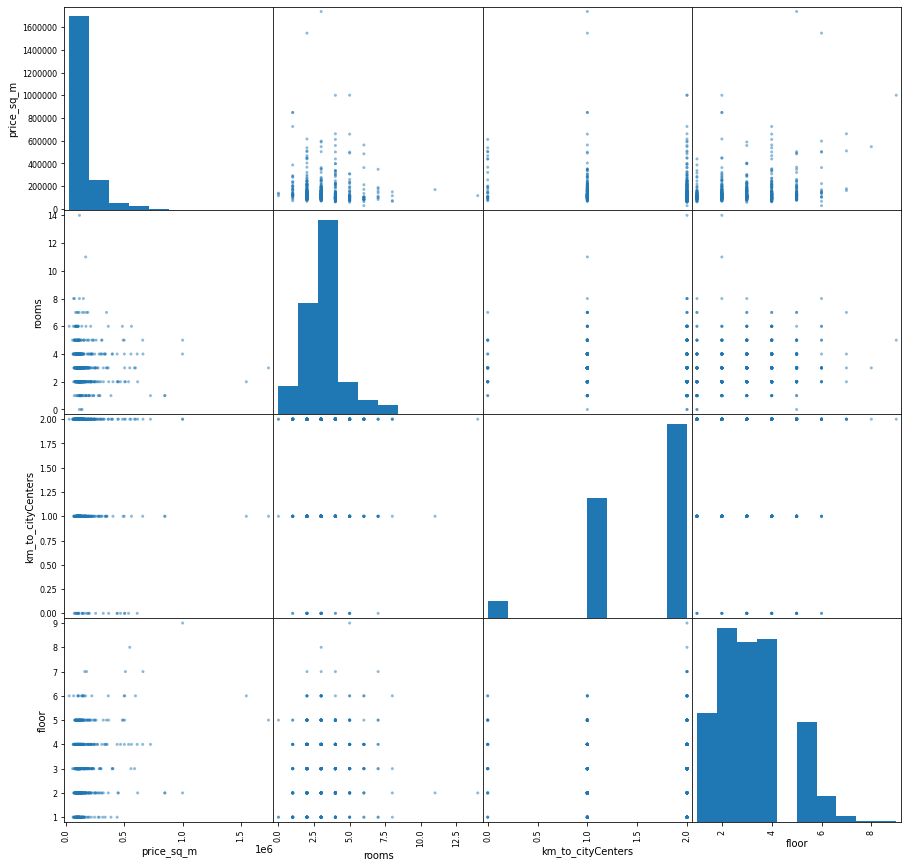

In [68]:
#plotting the scatter matrix
housing_center = spb_cityCenter[['price_sq_m','rooms','km_to_cityCenters','floor','first_day_exposition']]
pd.plotting.scatter_matrix(housing_center, figsize=(15, 15))
plt.show()

**Summary:**  Again, we're most interested in the leftmost column in this scatter matrix. 
1) Price to floor level ratio: The largest number of apartments for sale are teh apartments distributed between the floors 1-5. However, our previous analysis had shown that the highest price was recorded for the 'top' floor level. Whether the 5th floor is the top floor in this building is unknown. Additional research is required.

2) Previously we hypothesized that the city center can be considered within a distance of 0-2 km from the center of the city. As you can see on the histogram, there are quite a few real estate listings for the apartments directly in the center of St. Petersburg, and the highest price is registered at the premises at a distance of about 1 km from the center.

3) Similarly, the scatter matrix shows that the highest price is registered for an apartment with only 3 rooms. Previously we discovered that the largest number of residential areas for sale have 2-5 rooms.

Let us check the correlation between the relevant variables that might affect the price for the final time:

In [69]:
# finding the correlation between variables
df[['price_sq_m','total_area', 'km_to_cityCenters','floor']].corr()

,price_sq_m,total_area,km_to_cityCenters,floor
price_sq_m,1.000000,0.298829,-0.251029,0.130251
total_area,0.298829,1.000000,-0.209618,-0.025190
km_to_cityCenters,-0.251029,-0.209618,1.000000,0.013680
floor,0.130251,-0.025190,0.013680,1.000000


**Summary:**  From the above variable correlation table we can see that the 'total_area' variable has the strongest and positive correlation to the 'price_se_mp', so we can conclude the total area of the apartment is the most important variable that influences housing prices.

# Step 5. Overall conclusion

In the process of analyzing the data, we did the following:

In Step 1 we got familiar with the provided dataset and set the plan for processing the data to analyze it later

In step 2 we filled all the missing values appropriately and got rid of the outliers in the data. 

In step 3 we made the calculations that were needed for the later analysis, and added the new columns to the dataframe.

In step 4 we conducted an exploratory analysis of the data to find the answers to the questions that we were most interested in.

**Goal:** Our main goal was to find the parameters that will help us determine the market value of real estate properties. 

**Conclusion:** The main parameter is 'total_area' - it has the strongest positive Pearson correlation coefficient (~0.29). Therefore, 'total_area' has the biggest influence on an apartment’s price. Floor level of the apartment in the building impacts the price significantly as well (0.130251) but its effects are weaker. The distance from the downtown area has a negative correlation effect, meaning if the distance to the city center increases, the price of the apartment drops (-0.25).

||price_sq_m	|total_area	|km_to_cityCenters	|floor|
|---|---|---|---|--|
|price_sq_m	|1.000000	|0.298829	|-0.251029	|0.130251|

We also selected several other parameters that affect prices of the real estate:
1. 'last_price' is in the range of 1 to 12 million rubles.<br>
2. 'total_area' is in the range of 20 to 150 $m^2$.<br>
3. 'rooms' is in the range of 1 to 5.<br>
4. 'ceiling_height' is 2.2 m and 4 m.<br>


**Recommendations:**
1) Remove from the database all listings of the apartments that have not been sold for longer than 3 years.
3) Find out the reason for the sales that were closed "too fast" and enter this into the database in order to prevent fraudulent activity.